In [1]:
import os
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
from tqdm import tqdm
from pylab import rcParams
from Gait import ex_data
from tnorma import tnorma #pip install tnorma

rcParams['figure.figsize'] = 12,4

import warnings
warnings.filterwarnings('ignore')

In [2]:
kine_list = [i.replace('\\','/') for i in sorted(glob(f'csv/kine/*csv'))]
force_list = [i.replace('\\','/') for i in sorted(glob(f'csv/force/*csv'))]

kine_name = [f"{os.path.basename(i).split('.')[0]}" for i in kine_list]
force_name = [f"{os.path.basename(i).split('.')[0]}" for i in force_list]

In [3]:
kine_data = {}
for k, n in zip(kine_list, kine_name):
    kine_data[n] = k
    
force_data = {}
for f, n in zip(force_list, force_name):
    force_data[n] = f

In [50]:
k_cts = []  # 구간 사이 프레임이 몇개인지
f_cts = []

LAA_X = pd.DataFrame()

for name in tqdm(kine_data):

    k_df = pd.read_csv(kine_data[name])
    f_df = pd.read_csv(force_data[name])

    # event 프레임 저장
    k_Heel_Strike1  = k_df['Heel_Strike1'][0] 
    k_Toe_Off1      = k_df['Toe_Off1'][0]
    k_Heel_Strike2  = k_df['Heel_Strike2'][0]

    f_Heel_Strike1  = f_df['Heel_Strike1'][0] 
    f_Toe_Off1      = f_df['Toe_Off1'][0]    
    f_Heel_Strike2  = f_df['Heel_Strike2'][0]

    # 구간 사이 프레임 갯수
    k_frames = k_Heel_Strike2 - k_Heel_Strike1
    f_frames = f_Heel_Strike2 - f_Heel_Strike1 

    # phase 사이 데이터 추출
    k_phase = k_df[k_Heel_Strike1:k_Heel_Strike2]
    f_phase = f_df[f_Heel_Strike1:f_Heel_Strike2]

    columns1 = k_phase.columns
    columns2 = f_phase.columns

    # time-normalization
    ka,kb,kc = tnorma(k_phase)
    fa,fb,fc = tnorma(f_phase)

    k_cts.append(k_frames)
    f_cts.append(f_frames)

    # 시간 정규화 데이터 데이터프레임화
    k_total = pd.DataFrame(ka, columns=columns1)
    #f_total = pd.DataFrame(fa, columns=columns2)

    # 관찰하고싶은 변수 열 선택
    laa_x = k_total.iloc[:, 2]
    
    # 데이터프레임에 추가
    LAA_X[name] = laa_x
    print(LAA_X)

100%|██████████| 5/5 [00:00<00:00, 22.67it/s]

     S02_001_R_81_176
0           73.869698
1           75.491559
2           77.204987
3           78.920767
4           80.555075
..                ...
96          69.752500
97          69.675061
98          70.054072
99          70.844557
100         71.990172

[101 rows x 1 columns]
     S02_001_R_81_176  S02_002_R_81_176
0           73.869698         83.632351
1           75.491559         83.650928
2           77.204987         83.625500
3           78.920767         83.553075
4           80.555075         83.431987
..                ...               ...
96          69.752500         68.392376
97          69.675061         68.000151
98          70.054072         68.023990
99          70.844557         68.435924
100         71.990172         69.203780

[101 rows x 2 columns]
     S02_001_R_81_176  S02_002_R_81_176  S02_003_R_81_176
0           73.869698         83.632351         73.408402
1           75.491559         83.650928         75.144398
2           77.204987         83.6

In [51]:
LAA_X

,S02_001_R_81_176,S02_002_R_81_176,S02_003_R_81_176,S02_004_R_81_176,S02_005_R_81_176
0,73.869698,83.632351,73.408402,73.364636,71.968602
1,75.491559,83.650928,75.144398,74.867512,73.438143
2,77.204987,83.625500,76.920240,76.505145,75.101390
3,78.920767,83.553075,78.653633,78.184178,76.859410
4,80.555075,83.431987,80.267482,79.815320,78.616984
...,...,...,...,...,...
96,69.752500,68.392376,71.834695,71.540543,71.378970
97,69.675061,68.000151,71.107982,71.309315,71.344679
98,70.054072,68.023990,70.863069,71.525658,71.763550
99,70.844557,68.435924,71.073252,72.146013,72.577014


In [52]:
k_total.iloc[:, 2]

0      71.968602
1      73.438143
2      75.101390
3      76.859410
4      78.616984
         ...    
96     71.378970
97     71.344679
98     71.763550
99     72.577014
100    73.713750
Name: LT_ANKLE_ANGLE_X, Length: 101, dtype: float64

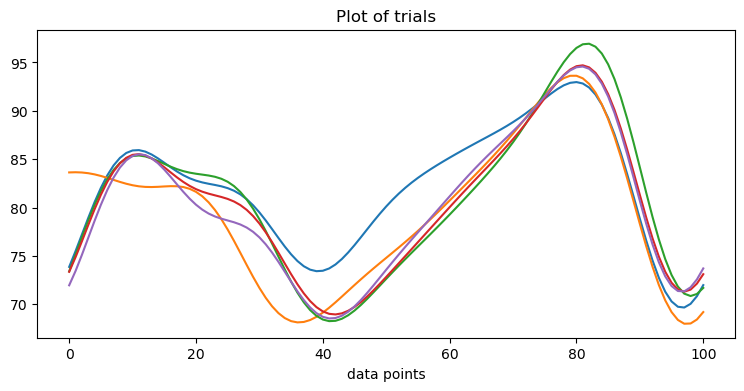

In [53]:
plt.figure(figsize=(9, 4))
plt.plot(LAA_X)
plt.xlabel('data points')
plt.title('Plot of trials')
plt.show()

In [56]:
Elite=pd.DataFrame()
Elite=LAA_X.iloc[:,:2]
Elite

,S02_001_R_81_176,S02_002_R_81_176
0,73.869698,83.632351
1,75.491559,83.650928
2,77.204987,83.625500
3,78.920767,83.553075
4,80.555075,83.431987
...,...,...
96,69.752500,68.392376
97,69.675061,68.000151
98,70.054072,68.023990
99,70.844557,68.435924


In [60]:
Intermediate=pd.DataFrame()
Intermediate=LAA_X.iloc[:,2:]
Intermediate

,S02_003_R_81_176,S02_004_R_81_176,S02_005_R_81_176
0,73.408402,73.364636,71.968602
1,75.144398,74.867512,73.438143
2,76.920240,76.505145,75.101390
3,78.653633,78.184178,76.859410
4,80.267482,79.815320,78.616984
...,...,...,...
96,71.834695,71.540543,71.378970
97,71.107982,71.309315,71.344679
98,70.863069,71.525658,71.763550
99,71.073252,72.146013,72.577014


In [67]:
Elitem, Elitesd = np.mean(Elite, axis=1), np.std(Elite, axis=1, ddof=1)
Intermediatem, Intermediatesd = np.mean(Intermediate, axis=1), np.std(Intermediate, axis=1, ddof=1)

In [63]:
ym, ysd = np.mean(LAA_X, axis=1), np.std(LAA_X, axis=1, ddof=1) # one line is all we need

In [65]:
Elitem

0      78.751025
1      79.571243
2      80.415243
3      81.236921
4      81.993531
         ...    
96     69.072438
97     68.837606
98     69.039031
99     69.640241
100    70.596976
Length: 101, dtype: float64

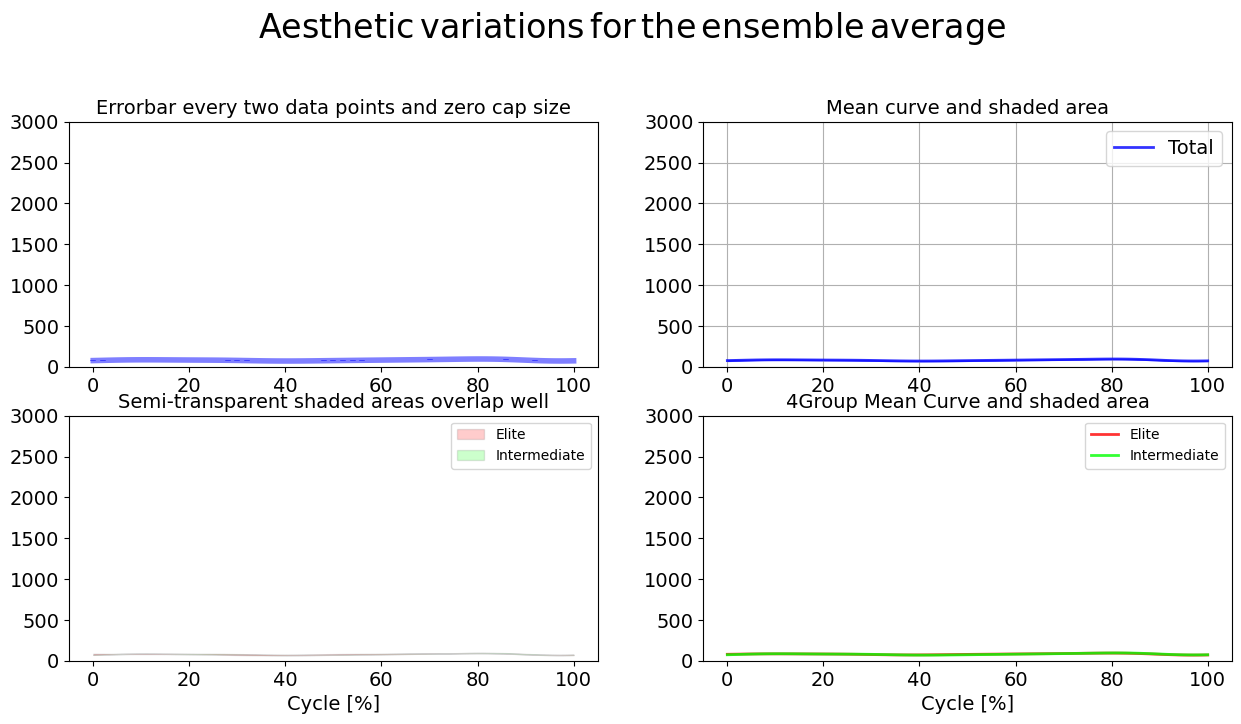

In [69]:
plt.rc('axes', labelsize=14,  titlesize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.figure(figsize=(15, 7))

ax1 = plt.subplot(221)
ax1.set_title('Errorbar every two data points and zero cap size')
ax1.set_ylim([0,3000])
ax1.errorbar(fb, ym, ysd, color = [0, 0, 1, 0.5], capsize=0, errorevery=2, lw=4)

ax2 = plt.subplot(222)
ax2.set_title('Mean curve and shaded area')
ax2.fill_between(fb, ym+ysd, ym-ysd, color = [0, 0, 1, 0.5])
ax2.plot(fb, ym, color = [0, 0, 1, .8], lw=2, label='Total')
ax2.legend(fontsize=14, loc='best', framealpha=.8)
ax2.set_ylim([0,3000])
ax2.grid()

ax3 = plt.subplot(223)
ax3.set_title('Semi-transparent shaded areas overlap well')
ax3.fill_between(fb, Elitem+Elitesd, Elitem-Elitesd,facecolor=(1,0,0,.2),edgecolor=(0,0,0,.1), label="Elite")
ax3.fill_between(fb, Intermediatem+Intermediatesd, Intermediatem-Intermediatesd,facecolor=(0,1,0,.2),edgecolor=(0,0,0,.1), label="Intermediate")
ax3.set_xlabel('Cycle [%]')
ax3.set_ylim([0,3000])
# fill_between() command creates a PolyCollection that is not supported by the legend()
ax3.legend()

ax4 = plt.subplot(224)
ax4.set_title('4Group Mean Curve and shaded area')
ax4.plot(fb, Elitem, color = [1, 0, 0, .8], lw=2, label='Elite')
ax4.plot(fb, Intermediatem, color = [0, 1, 0, .8], lw=2, label='Intermediate')
ax4.set_xlabel('Cycle [%]')
ax4.set_ylim([0,3000])
# fill_between() command creates a PolyCollection that is not supported by the legend()
ax4.legend()

plt.suptitle(r'$\mathrm{Aesthetic\,variations\,for\,the\,ensemble\,average}$', fontsize=24, y=1.04)
plt.show()

In [70]:
elite=peaks.iloc[0,0:650]
intermediate=peaks.iloc[0,650:1300]
elite.mean(), intermediate.mean()

NameError: name 'peaks' is not defined

In [71]:
elite.std(ddof=1), intermediate.std(ddof=1)

NameError: name 'elite' is not defined

In [73]:
pd.DataFrame(k_cts)

,0
0,72
1,65
2,69
3,70
4,74
